In [1]:
# Importing modules
import pandas as pd
import os


In [2]:
data = pd.read_csv('movies_filled_cleaned_processed.csv')
# Print head
data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,release_date_filled,release_year,running_time_mins
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,"December 16, 2015",2015,138
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,"April 24, 2019",2019,181
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,"December 16, 2009",2009,162
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,"January 29, 2018",2018,134
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,"April 23, 2018",2018,149


In [3]:
text_data = data[["Movie Info"]]

In [4]:
# Load the regular expression library
import re
# Remove punctuation
text_data['Movie_Info_clean'] = \
text_data['Movie Info'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
text_data['Movie_Info_clean'] = \
text_data['Movie_Info_clean'].map(lambda x: x.lower())
# Print out the first rows of papers
text_data['Movie_Info_clean'].head()

<ipython-input-4-676e71bf5d7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['Movie_Info_clean'] = \
<ipython-input-4-676e71bf5d7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['Movie_Info_clean'] = \


0    as a new threat to the galaxy rises rey a dese...
1    after the devastating events of avengers: infi...
2    a paraplegic marine dispatched to the moon pan...
3    t'challa heir to the hidden but advanced kingd...
4    the avengers and their allies must be willing ...
Name: Movie_Info_clean, dtype: object

In [5]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


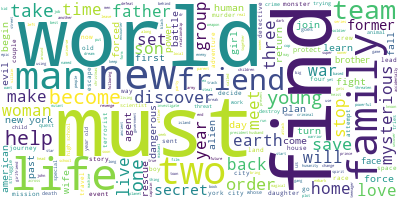

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text_data['Movie_Info_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = text_data.Movie_Info_clean.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['new', 'threat', 'galaxy', 'rises', 'rey', 'desert', 'scavenger', 'finn', 'ex', 'stormtrooper', 'must', 'join', 'han', 'solo', 'chewbacca', 'search', 'one', 'hope', 'restoring', 'peace']


[nltk_data] Downloading package stopwords to /Users/aruvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [9]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"new" + 0.005*"find" + 0.005*"man" + 0.004*"woman" + 0.004*"must" + '
  '0.004*"son" + 0.004*"family" + 0.004*"young" + 0.004*"help" + '
  '0.003*"order"'),
 (1,
  '0.005*"world" + 0.005*"team" + 0.005*"must" + 0.004*"return" + '
  '0.004*"young" + 0.003*"agent" + 0.003*"learn" + 0.003*"life" + '
  '0.003*"friends" + 0.003*"prince"'),
 (2,
  '0.006*"new" + 0.004*"finds" + 0.003*"years" + 0.003*"man" + '
  '0.003*"relationship" + 0.003*"takes" + 0.003*"earth" + 0.003*"daughter" + '
  '0.003*"discovers" + 0.003*"tries"'),
 (3,
  '0.007*"world" + 0.006*"must" + 0.005*"war" + 0.005*"family" + 0.005*"new" + '
  '0.004*"earth" + 0.004*"team" + 0.004*"take" + 0.004*"one" + '
  '0.004*"mysterious"'),
 (4,
  '0.008*"must" + 0.006*"life" + 0.005*"family" + 0.005*"one" + 0.004*"agent" '
  '+ 0.004*"man" + 0.004*"young" + 0.004*"find" + 0.004*"world" + '
  '0.003*"help"'),
 (5,
  '0.009*"new" + 0.008*"world" + 0.006*"young" + 0.005*"must" + '
  '0.004*"american" + 0.004*"help" + 0.00

In [14]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis


/Users/aruvi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Users/aruvi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.068707 -0.046787       1        1  12.105754
9      0.097514  0.062000       2        1  11.832345
6     -0.009119  0.042230       3        1  11.526542
5      0.042735  0.010410       4        1  10.873388
3      0.007310 -0.077994       5        1  10.306613
4     -0.016715 -0.053112       6        1   9.924025
0     -0.036584  0.058643       7        1   9.488620
1     -0.089965 -0.037540       8        1   8.686693
7     -0.004014 -0.034319       9        1   7.993661
2     -0.059869  0.076471      10        1   7.262359, topic_info=            Term       Freq      Total Category  logprob  loglift
51         world  72.000000  72.000000  Default  30.0000  30.0000
458         high  23.000000  23.000000  Default  29.0000  29.0000
41          home  27.000000  27.000000  Default  28.0000  28.0000
2567      series  10.000000  10.000000  Default  27.0000  27.0000
838   government  10.000000  10.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
784         york   2.161635  22.078538  Topic10  -6.1941   0.2987
104         love   2.153804  24.943872  Topic10  -6.1978   0.1731
279          two   2.243242  45.114572  Topic10  -6.1571  -0.3788
162       family   2.233433  49.260657  Topic10  -6.1615  -0.4711
29         order   2.150615  29.470353  Topic10  -6.1993   0.0048

[805 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
897       5  0.174162     action
897       6  0.174162     action
897       7  0.174162     action
897       9  0.348325     action
4531     10  0.714693     addams
...     ...       ...        ...
184       7  0.101419      young
184       8  0.101419      young
184       9  0.060851      young
184      10  0.020284      young
3978      6  0.680765  zamperini

[1762 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 7, 6, 4, 5, 1, 2, 8, 3])